# OK-Cupid Date Scientist

This is a project for CodeCademy Machine Learning Career Path.

I'll assume OKCupid partners with two associations:
- The first one deals with drugs addictions and would like to identify the most important factors
- The second one deals with minority and inclusion andd would like to understand if we can build a model that would give ethnicity

# Data and Libraries Import

The dataset is from 2012. That is ok as this is a project meant for studying. In real life, we would need to obtain fresher data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

# display up to 200 rows and 50 columns for dataframes
pd.options.display.max_rows = None
pd.options.display.max_columns = 50

**Dataset variables description:**<br><br>
**age:** an integer giving the age of the user<br>
**body_type:**: describes the body and can take 12 values<br>
**diet:** describes if the user is vegetarian, omnivorous etc<br>
**drinks:** gives drinking habits of the user<br>
**drugs:** gives drugs habits of the user<br>
**education:** gives the highest degree of the user<br>
**essay0** to **essay9:** words by the user describing him/her<br>
**ethnicity:** ethnicity of the user<br>
**height:** height (us metrics) of the user<br>
**income:** revenues (in $US) of the user<br>
**job:** job of the user<br>
**last_online:** date of last connection of the user<br>
**location:** city and state of the user (US centrics)<br>
**offspring:** number of childs if any<br>
**orientation:** gives the sexual orientation of the user<br>
**pets:** if the user has pets, and which<br>
**religion:** gives the religion of the user and if it matters<br>
**sex:** gives the sex of the user<br>
**sign:** describes astrological sign of the user and if it matters<br>
**smokes:** indicates the habits of smoking<br>
**speaks:** string describing the languages that the user speaks<br>
**status:** describes the status of the user (single, married, available etc)

In [3]:
df = pd.read_csv('profiles.csv')
df.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# EDA

In [4]:
dfe = df.copy()
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [13]:
!pip install ydata-profiling

                                              0.0/357.3 kB ? eta -:--:--
     -------------                          122.9/357.3 kB 7.0 MB/s eta 0:00:01
     -------------------------------------- 357.3/357.3 kB 7.4 MB/s eta 0:00:00
                                              0.0/102.7 kB ? eta -:--:--
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
                                              0.0/14.6 MB ? eta -:--:--
     -                                        0.6/14.6 MB 18.8 MB/s eta 0:00:01
     ---                                      1.3/14.6 MB 16.0 MB/s eta 0:00:01
     ------                                   2.2/14.6 MB 20.2 MB/s eta 0:00:01
     --------                                 3.2/14.6 MB 18.8 MB/s eta 0:00:01
     -----------                              4.3/14.6 MB 19.8 MB/s eta 0:00:01
     --------------                           5.3/14.6 MB 19.9 MB/s eta 0:00:01
     -----------------                        6.3/14.6 MB 20.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.


In [14]:
from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(dfe,title="OK Cupid Profile")
# Save the report to .html
profile.to_file("OKC_report.html")

c:\Users\valer\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\valer\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Demographics

In [10]:
dfe_1 = dfe[dfe['age'] <= 80]
dfe_1['age'] = np.log(dfe['age'])

C:\Users\valer\AppData\Local\Temp\ipykernel_11388\635453829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe_1['age'] = np.log(dfe['age'])


<Axes: xlabel='age', ylabel='Count'>

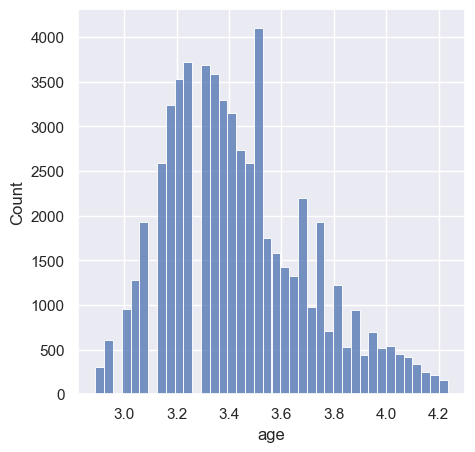

In [11]:
plt.figure(figsize=(5, 5))
sns.histplot(data=dfe_1, x='age', bins=40)

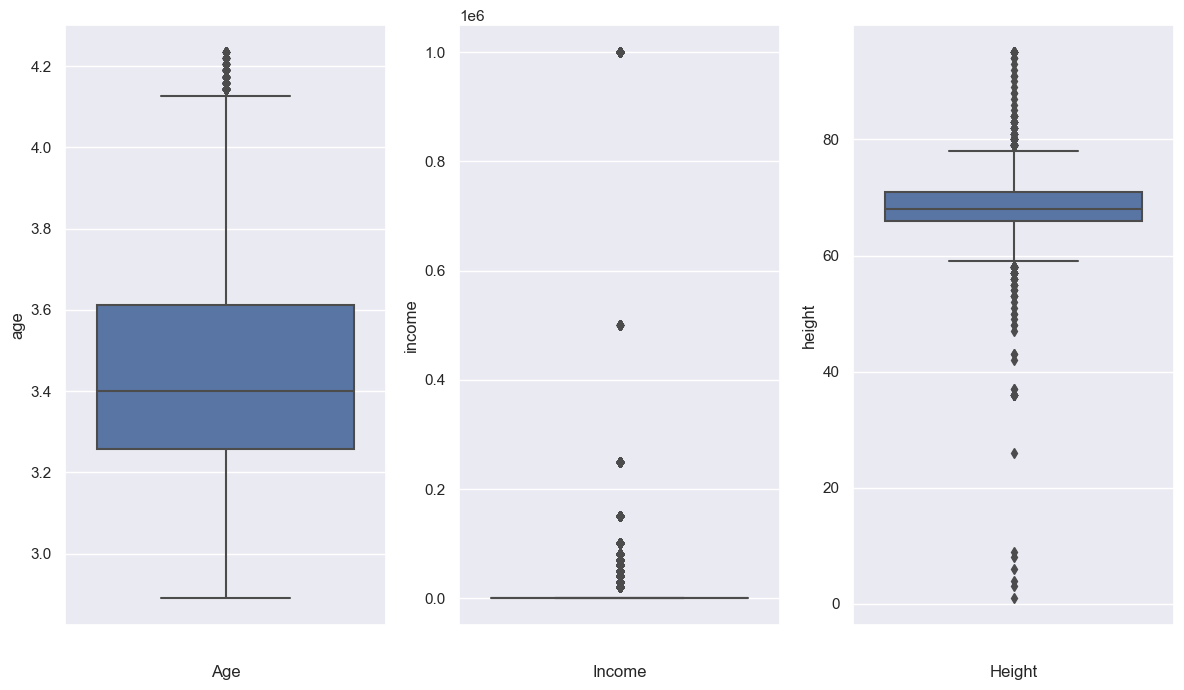

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,7))
sns.boxplot(data=dfe_1, y='age', ax=axes[0])
sns.boxplot(data=dfe, y='income', ax=axes[1])
sns.boxplot(data=dfe, y='height', ax=axes[2])
axes[0].set_title('Age', y=-0.1)
axes[1].set_title('Income', y=-0.1)
axes[2].set_title('Height', y=-0.1)
plt.tight_layout()


## Look and habits

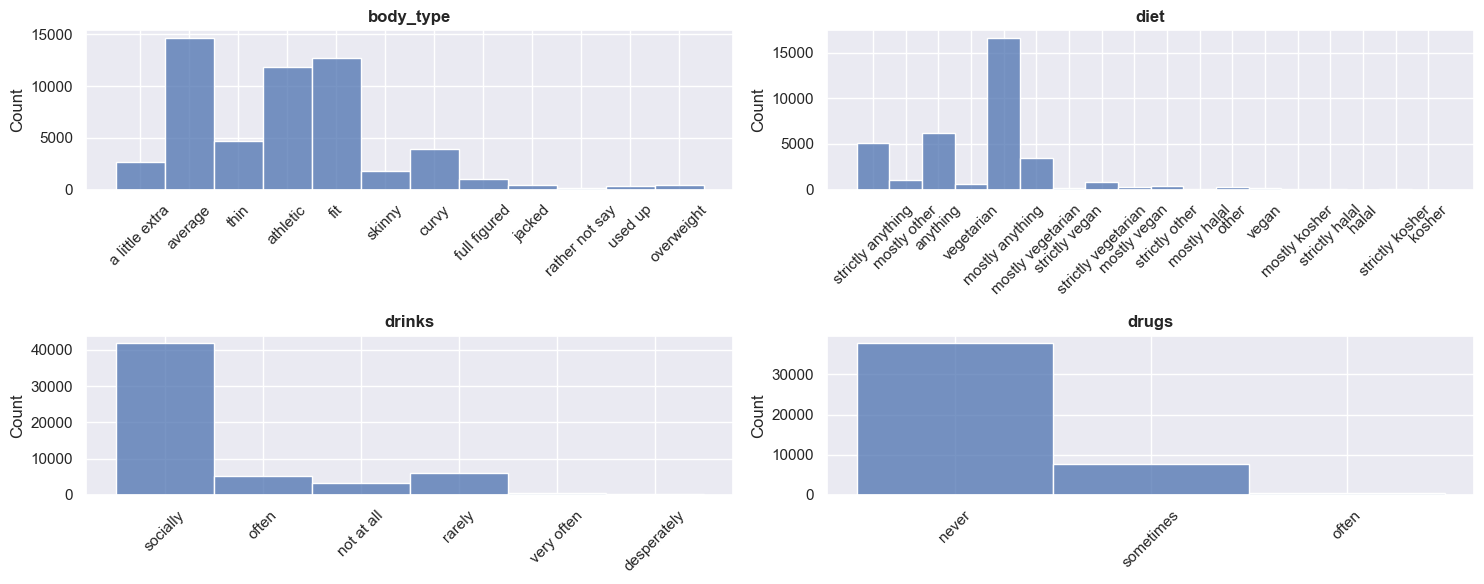

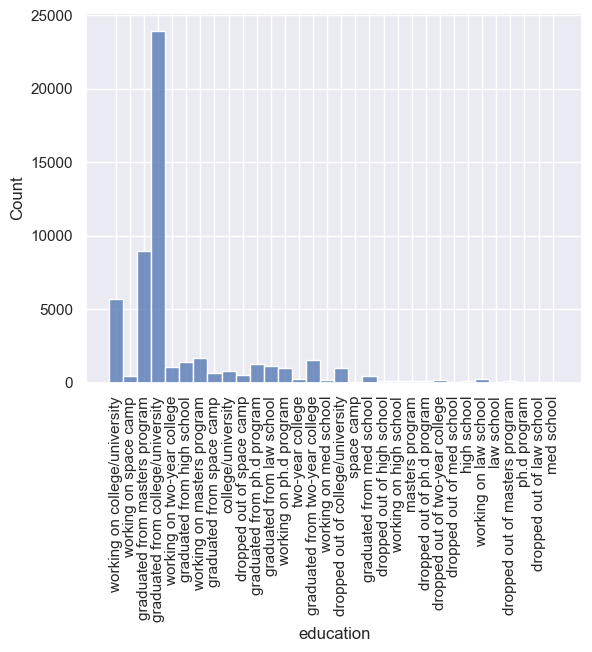

In [91]:
feat_draw = ['body_type', 'diet', 'drinks', 'drugs']

def draw_hist(df, features, n_charts):
    """ draw an histogram for some features of a given dataframe

    Keyword arguments:
    features -- a list of string representing the feature to draw
    df -- a dataframe to draw from
    n_charts -- an integer thet represent the charts per line
    """

    # set the subplots size
    num_features = len(features)
    ncols = min(n_charts, num_features)
    nrows = (num_features + ncols -1) // ncols
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=[15,6])

    # plot subplot
    for ax, feature in zip(axes.ravel(), features):
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_title(feature, fontweight='bold')

        xticks = ax.get_xticks()
        xticklabels = ax.get_xticklabels()
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, rotation=45)
        ax.set_xlabel('')

    plt.tight_layout()
    plt.show();

draw_hist(dfe, feat_draw, 2)
sns.histplot(data=dfe, x='education')
plt.xticks(rotation = 90)
plt.show();


## Columns Drop

I will not work with the essays columns. I will work on NLP on another project so I can remove them.<br>
Also, the `last_online` columns is of no interest for that study so I will remove it too.

In [7]:
duplicateRows = dfe.duplicated().sum()
print(f'There are {duplicateRows} duplicate rows.')
nan_rows = dfe.isna().any(axis=1).sum()
print(f'There are {nan_rows} rows with some Nan elements')

There are 0 duplicate rows.
There are 55539 rows with some Nan elements


There are no duplicates but a there are a lof of NA (up to 60% for the `offspring` variable). I will remove some features now and will deal with the features I keep after the split of the dataset in train, test set.
<br>
Regarding the types of data, it seems relevant (Height and Age are numeric)

In [8]:
for col in dfe.columns:
    print(f'{col}:', dfe[col].nunique())

age: 54
body_type: 12
diet: 18
drinks: 6
drugs: 3
education: 32
essay0: 54350
essay1: 51516
essay2: 48635
essay3: 43533
essay4: 49260
essay5: 48963
essay6: 43603
essay7: 45554
essay8: 39324
essay9: 45443
ethnicity: 217
height: 60
income: 13
job: 21
last_online: 30123
location: 199
offspring: 15
orientation: 3
pets: 15
religion: 45
sex: 2
sign: 48
smokes: 5
speaks: 7647
status: 5


There are so many NaN or useless values for the `income` feature that I have to remove it.

In [206]:
income_na = df[df['income'] == -1]['income'].count()
print(f'The number of income values that are set to -1 is equal to {income_na}.')

The number of income values that are set to -1 is equal to 48442.


The `location` column shows that all samples are from california. I have no intention to study the file city per city (that would not help for the purpose of that study anyhow) so I will remove the column.

In [216]:
loc_state = df['location'].str.split(', ')[1]
print(loc_state)

['oakland', 'california']


I will remove the `offspring` feature as there are too many NaN values.

In [217]:
offspring_na = round(df['offspring'].isna().sum()/len(df)*100, 2)
print(f'There are {offspring_na}% Na values for the offspring feature.')

There are 59.32% Na values for the offspring feature.


I can now remove all columns that I have identified as useless or impossible to treat due to the high level of NaN.

In [233]:
columns_to_remove = list(range(6, 15)) + [18]+ [20] + [21]
df =df.drop(columns=df.columns[columns_to_remove])

## Columns Cleaning and Formatting

In [240]:
df['body_type'].value_counts().sum()/len(df)


0.911653821772929

In [222]:
df['ethnicity'].fillna('', inplace=True)
unique_ethnic = set(', '.join(df['ethnicity']).split(', '))

In [224]:
print(unique_ethnic)

{'', 'other', 'middle eastern', 'pacific islander', 'hispanic / latin', 'indian', 'black', 'native american', 'asian', 'white'}


In [223]:
# create a columns per ethnicity
for key in dictmapper:
    df_train[key] = 0
    df_test[key] = 0
    
dictmapper = {'unknown': 10, 'middle eastern':4, 'other':6, 'pacific islander':7, 'hispanic / latin':2,
               'indian':3, 'black':1, 'native american':5, 'asian':0, 'white':8}
df['ethnicity'] = df['ethnicity'].apply(lambda x: dictmapper[x])


{'', 'other', 'middle eastern', 'pacific islander', 'hispanic / latin', 'indian', 'black', 'native american', 'asian', 'white'}


NameError: name 'df_train' is not defined

In [126]:
df['religion'].unique()
e = df['religion'].unique()
e = pd.DataFrame(e)
e = e.dropna()
set_e = set()
for index, row in e.iterrows():
    set_e.add(row[0])
new_set_e = set()
all_e = []
for item in set_e:
    item = item.split(', ')
    for x in item:
        new_set_e.add(x)

print(new_set_e)

for el in new_set_e:
    

{'hinduism and somewhat serious about it', 'hinduism', 'judaism and somewhat serious about it', 'buddhism and very serious about it', 'catholicism but not too serious about it', 'agnosticism and somewhat serious about it', 'judaism', 'christianity and laughing about it', 'islam and somewhat serious about it', 'buddhism and somewhat serious about it', 'christianity and very serious about it', 'judaism and very serious about it', 'buddhism', 'christianity but not too serious about it', 'hinduism but not too serious about it', 'catholicism and very serious about it', 'other and very serious about it', 'other but not too serious about it', 'other', 'agnosticism and very serious about it', 'islam but not too serious about it', 'atheism', 'agnosticism', 'atheism and somewhat serious about it', 'buddhism but not too serious about it', 'agnosticism and laughing about it', 'agnosticism but not too serious about it', 'other and laughing about it', 'islam and very serious about it', 'catholicism 